<a href="https://colab.research.google.com/github/VenkatLakkireddy/Assignment-2/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2**
**Data link:** https://app.box.com/s/7qv44umhw0vnzgmoe9krfkfkv5kf2atv

The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes
(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age)
and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the
outcome is diabetes and 0 means no diabetes). For this assignment purposes we will consider this data
as a population. Use this data to perform the following:

## a)
set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.


In [ ]:
# Step 1: Load the data from the provided link

import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('/diabetes.csv')

# Display the first few rows of the DataFrame
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Step 2: Set a random seed and sample 25 observations
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample_df = df.sample(n=25, random_state=42)



In [ ]:
# Step 3: Calculate statistics for Glucose

# Population statistics
population_glucose_mean = df['Glucose'].mean()
population_glucose_max = df['Glucose'].max()

# Sample statistics
sample_glucose_mean = sample_df['Glucose'].mean()
sample_glucose_max = sample_df['Glucose'].max()

# Print the statistics
print(f"Population Glucose Mean: {population_glucose_mean}")
print(f"Population Glucose Max: {population_glucose_max}")
print(f"Sample Glucose Mean: {sample_glucose_mean}")
print(f"Sample Glucose Max: {sample_glucose_max}")



Population Glucose Mean: 120.89453125
Population Glucose Max: 199
Sample Glucose Mean: 116.64
Sample Glucose Max: 183


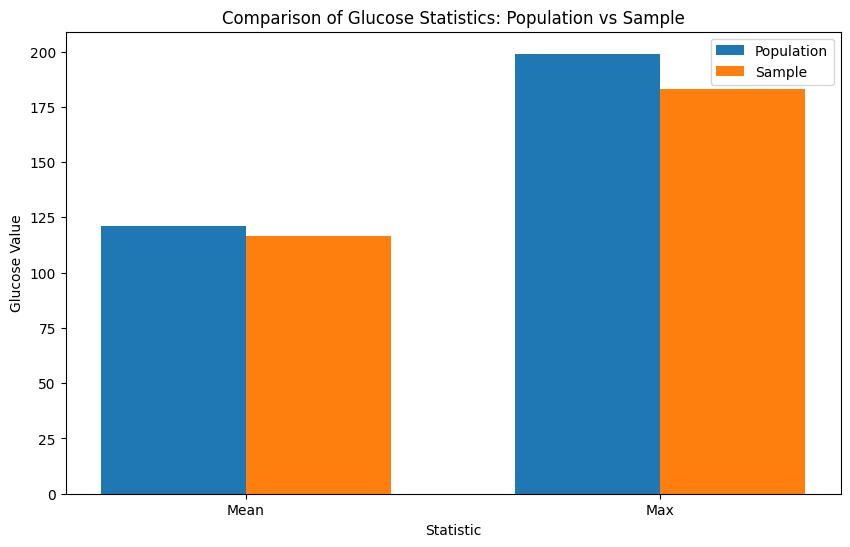

In [ ]:
# Step 4: Visualize the comparison using charts

import matplotlib.pyplot as plt

# Create a bar plot for comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Bar widths
bar_width = 0.35

# Positions of bars
index = np.arange(2)

# Population statistics
population_stats = [population_glucose_mean, population_glucose_max]
sample_stats = [sample_glucose_mean, sample_glucose_max]

bar1 = ax.bar(index, population_stats, bar_width, label='Population')
bar2 = ax.bar(index + bar_width, sample_stats, bar_width, label='Sample')

# Adding labels
ax.set_xlabel('Statistic')
ax.set_ylabel('Glucose Value')
ax.set_title('Comparison of Glucose Statistics: Population vs Sample')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Mean', 'Max'])
ax.legend()

# Show plot
plt.show()


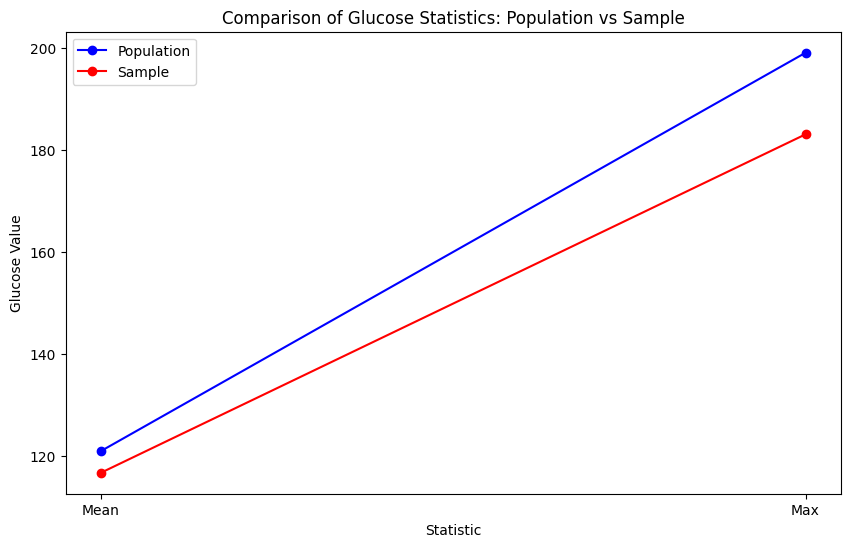

In [ ]:
# Create a line chart for comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the population statistics
ax.plot(['Mean', 'Max'], population_stats, marker='o', linestyle='-', label='Population', color='b')

# Plotting the sample statistics
ax.plot(['Mean', 'Max'], sample_stats, marker='o', linestyle='-', label='Sample', color='r')

# Adding labels
ax.set_xlabel('Statistic')
ax.set_ylabel('Glucose Value')
ax.set_title('Comparison of Glucose Statistics: Population vs Sample')
ax.legend()

# Show line chart
plt.show()

## **Findings:**

Population Glucose Mean: 120.89453125

Population Glucose Max: 199

Sample Glucose Mean: 116.64

Sample Glucose Max: 183

The sample mean glucose level is slightly lower than the population mean.

The sample maximum glucose value is also lower than the population maximum, but the difference is not substantial.

## b)
Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

Population BMI 98th Percentile: 47.52599999999996
Sample BMI 98th Percentile: 40.248


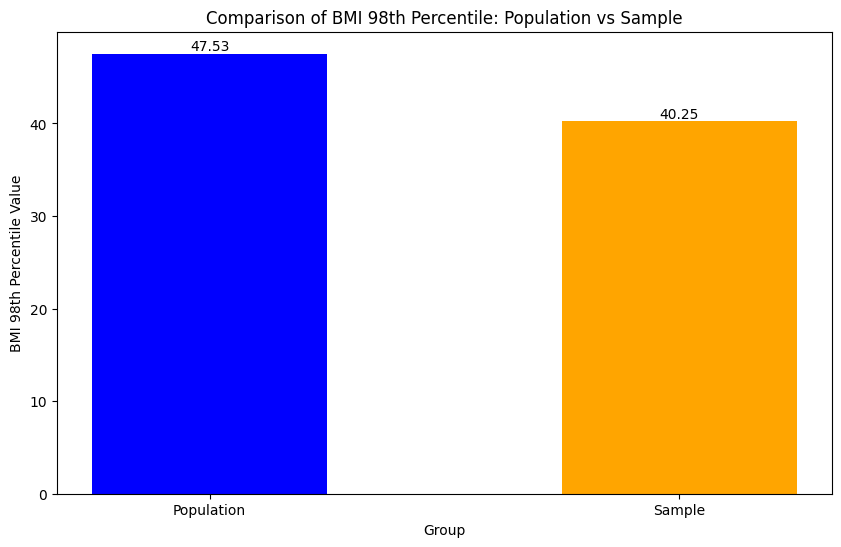

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Load the data into a DataFrame
df = pd.read_csv('/diabetes.csv')

# Set the random seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample_df = df.sample(n=25, random_state=42)

# Calculate the 98th percentile for BMI
# Population 98th percentile
population_bmi_98th_percentile = df['BMI'].quantile(0.98)

# Sample 98th percentile
sample_bmi_98th_percentile = sample_df['BMI'].quantile(0.98)

print(f"Population BMI 98th Percentile: {population_bmi_98th_percentile}")
print(f"Sample BMI 98th Percentile: {sample_bmi_98th_percentile}")

# Create a bar plot for the 98th percentile comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Bar widths
bar_width = 0.5

# Population and sample 98th percentiles
bmi_percentiles = [population_bmi_98th_percentile, sample_bmi_98th_percentile]

# Bar positions
index = np.arange(2)

# Create bars
bars = ax.bar(index, bmi_percentiles, bar_width, color=['blue', 'orange'])

# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Adding labels
ax.set_xlabel('Group')
ax.set_ylabel('BMI 98th Percentile Value')
ax.set_title('Comparison of BMI 98th Percentile: Population vs Sample')
ax.set_xticks(index)
ax.set_xticklabels(['Population', 'Sample'])

# Show plot
plt.show()

# **Findings:**

Population BMI 98th Percentile: 47.53

Sample BMI 98th Percentile: 40.25


The sample 98th percentile of BMI is slightly lower than the population 98th percentile, indicating that the sample may not fully capture the higher end of BMI values.

# c)
Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison.

Population BloodPressure Mean: 69.10546875
Population BloodPressure Std Dev: 19.355807170644777
Population BloodPressure 95th Percentile: 90.0
Bootstrap Mean Mean: 69.15045333333333
Bootstrap Mean Std Dev: 1.7187993688511027
Bootstrap Std Dev Mean: 19.03519575354823
Bootstrap Std Dev Std Dev: 2.2567198396299593
Bootstrap 95th Percentile Mean: 91.15389999999998
Bootstrap 95th Percentile Std Dev: 2.2269864677305256


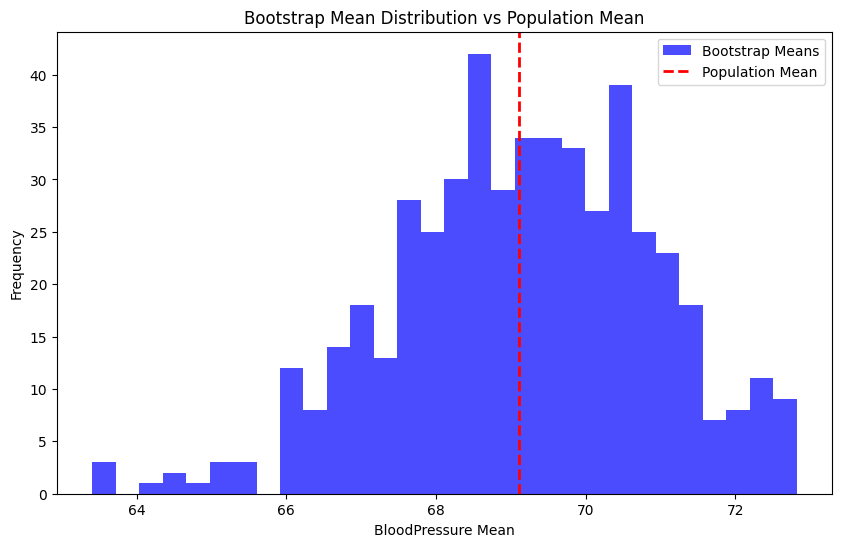

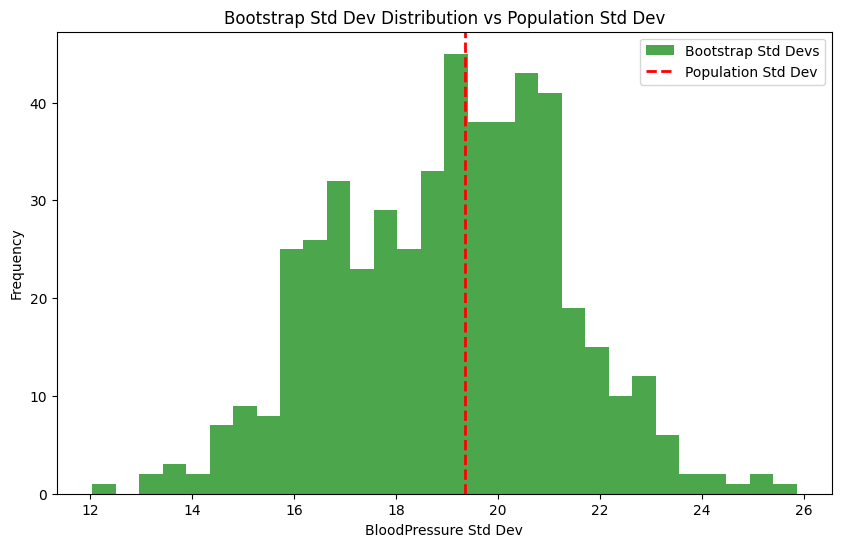

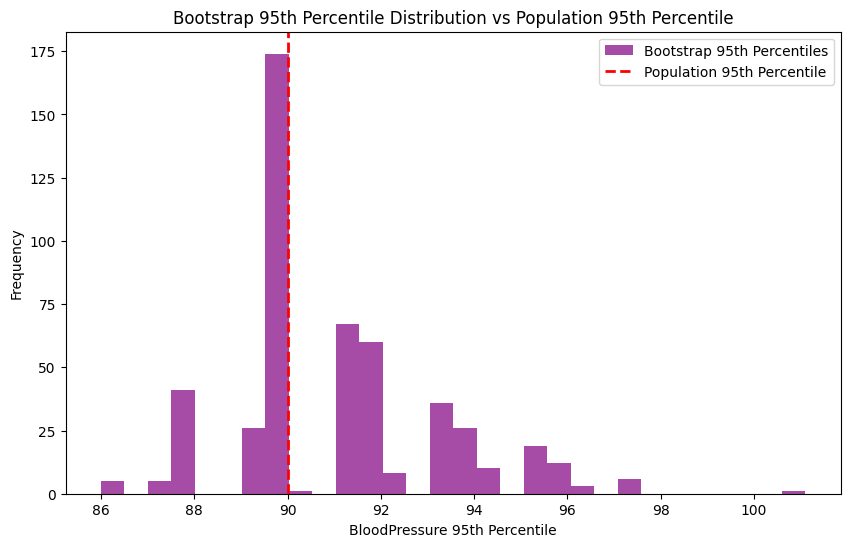

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('/diabetes.csv')

# Population statistics for BloodPressure
population_bp_mean = df['BloodPressure'].mean()
population_bp_std = df['BloodPressure'].std()
population_bp_percentile_95 = df['BloodPressure'].quantile(0.95)

print(f"Population BloodPressure Mean: {population_bp_mean}")
print(f"Population BloodPressure Std Dev: {population_bp_std}")
print(f"Population BloodPressure 95th Percentile: {population_bp_percentile_95}")

# Set random seed for reproducibility
np.random.seed(42)

# Bootstrap sampling parameters
num_samples = 500
sample_size = 150

# Create lists to store the statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles_95 = []

# Generate bootstrap samples and compute statistics
for _ in range(num_samples):
    sample = df['BloodPressure'].sample(n=sample_size, replace=True, random_state=np.random.randint(1000))
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_percentiles_95.append(sample.quantile(0.95))

# Convert to DataFrames for easier manipulation
bootstrap_stats = pd.DataFrame({
    'Mean': bootstrap_means,
    'Std Dev': bootstrap_stds,
    '95th Percentile': bootstrap_percentiles_95
})

# Calculate the mean, std, and 95th percentile of the bootstrap statistics
bootstrap_mean_mean = bootstrap_stats['Mean'].mean()
bootstrap_mean_std = bootstrap_stats['Mean'].std()
bootstrap_std_mean = bootstrap_stats['Std Dev'].mean()
bootstrap_std_std = bootstrap_stats['Std Dev'].std()
bootstrap_percentile_mean = bootstrap_stats['95th Percentile'].mean()
bootstrap_percentile_std = bootstrap_stats['95th Percentile'].std()

print(f"Bootstrap Mean Mean: {bootstrap_mean_mean}")
print(f"Bootstrap Mean Std Dev: {bootstrap_mean_std}")
print(f"Bootstrap Std Dev Mean: {bootstrap_std_mean}")
print(f"Bootstrap Std Dev Std Dev: {bootstrap_std_std}")
print(f"Bootstrap 95th Percentile Mean: {bootstrap_percentile_mean}")
print(f"Bootstrap 95th Percentile Std Dev: {bootstrap_percentile_std}")

# Create charts for comparison

# Plot for Mean Comparison
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(bootstrap_stats['Mean'], bins=30, alpha=0.7, color='blue', label='Bootstrap Means')
ax.axvline(population_bp_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
ax.set_xlabel('BloodPressure Mean')
ax.set_ylabel('Frequency')
ax.set_title('Bootstrap Mean Distribution vs Population Mean')
ax.legend()
plt.show()

# Plot for Std Dev Comparison
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(bootstrap_stats['Std Dev'], bins=30, alpha=0.7, color='green', label='Bootstrap Std Devs')
ax.axvline(population_bp_std, color='red', linestyle='dashed', linewidth=2, label='Population Std Dev')
ax.set_xlabel('BloodPressure Std Dev')
ax.set_ylabel('Frequency')
ax.set_title('Bootstrap Std Dev Distribution vs Population Std Dev')
ax.legend()
plt.show()

# Plot for 95th Percentile Comparison
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(bootstrap_stats['95th Percentile'], bins=30, alpha=0.7, color='purple', label='Bootstrap 95th Percentiles')
ax.axvline(population_bp_percentile_95, color='red', linestyle='dashed', linewidth=2, label='Population 95th Percentile')
ax.set_xlabel('BloodPressure 95th Percentile')
ax.set_ylabel('Frequency')
ax.set_title('Bootstrap 95th Percentile Distribution vs Population 95th Percentile')
ax.legend()
plt.show()


# **Findings**

**Mean BloodPressure:**

The mean BloodPressure from the bootstrap samples (69.15) is very close to the population mean (69.11). The slight difference indicates that the bootstrap samples are well-representative of the population.
The standard deviation of means from the bootstrap samples (1.72) reflects the variability in the sample means, which is typical for bootstrap analysis.

**Standard Deviation:**

The mean standard deviation from bootstrap samples (19.04) is very close to the population standard deviation (19.36). This shows that the bootstrap samples accurately capture the variability in the population.

**95th Percentile:**

The 95th percentile from the bootstrap samples (91.15) is slightly higher than the population percentile (90.00). This may indicate that the bootstrap samples tend to include higher values in the tail, possibly due to sampling variability.